In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_subscribers = pd.read_csv("/Users/awesomezoey/Desktop/MA_FinalProject/subscribers.csv")
df_subscribers.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [3]:
df_channel = pd.read_csv("/Users/awesomezoey/Desktop/MA_FinalProject/channel_spend_graduate.csv")
df_channel.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [56]:
df_subscribers.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

## Part 1. General Data Description

In [4]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [5]:
df_subscribers["age"].describe()

count    1.924590e+05
mean     7.579755e+02
std      1.920204e+05
min      0.000000e+00
25%      3.500000e+01
50%      4.600000e+01
75%      5.700000e+01
max      8.172000e+07
Name: age, dtype: float64

In [6]:
for i in df_subscribers.columns:
    print(i,"|",df_subscribers[i].isnull().sum())

Unnamed: 0 | 0
subid | 0
package_type | 35574
num_weekly_services_utilized | 110450
preferred_genre | 36326
intended_use | 3549
weekly_consumption_hour | 37930
num_ideal_streaming_services | 112170
age | 35169
male_TF | 269
country | 0
attribution_technical | 0
attribution_survey | 2644
op_sys | 13375
months_per_bill_period | 0
plan_type | 0
monthly_price | 0
discount_price | 0
account_creation_date | 0
trial_end_date | 0
initial_credit_card_declined | 0
join_fee | 34904
language | 0
payment_type | 135578
num_trial_days | 0
current_sub_TF | 0
payment_period | 0
last_payment | 95391
next_payment | 97378
cancel_date | 190797
trial_completed | 0


In [7]:
type(df_subscribers.columns)

pandas.core.indexes.base.Index

In [8]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   channel    40 non-null     object
 1   date       40 non-null     int64 
 2   spend_AED  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [9]:
df_channel["date"].unique()

array([201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002])

In [10]:
df_subscribers.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [11]:
df_channel.describe()

,date,spend_AED
count,40.000000,40.000000
mean,201932.500000,8897.400000
std,40.373258,12161.404319
min,201907.000000,12.000000
25%,201908.750000,143.500000
50%,201910.500000,1700.000000
75%,201934.250000,14500.000000
max,202002.000000,44000.000000


In [12]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [13]:
#Replace NaN with 0

#number of OTT services currently subscribed to, self-reported upon signup
df_subscribers['num_weekly_services_utilized'] = df_subscribers['num_weekly_services_utilized'].fillna(0)

#number of television or movies consumed per week, self-reported upon signup
df_subscribers['weekly_consumption_hour'] = df_subscribers['weekly_consumption_hour'].fillna(0)

#subscriber's target number of services (Mevod, Starz, etc.) subscribed to, self-reported upon signup
df_subscribers['num_ideal_streaming_services'] = df_subscribers['num_ideal_streaming_services'].fillna(0)

#amount user paid to sign up
df_subscribers['join_fee'] = df_subscribers['join_fee'].fillna(0)

df_subscribers.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized         0
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour              0
num_ideal_streaming_services         0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

In [14]:
#Age
df_subscribers['age'].max()

81720000.0

In [15]:
df_subscribers['age'].values[df_subscribers['age'].values > 120] = None
print("Max of age:", df_subscribers['age'].max())
print("Mean of age:", df_subscribers['age'].mean())

Max of age: 108.0
Mean of age: 46.1604735652309


In [16]:
#Using the mean = 46.16 to fill the NA values
df_subscribers['age'] = df_subscribers['age'].fillna(46.16)
df_subscribers['age'].mean()

46.160398557249536

In [17]:
df_subscribers['intended_use'].unique()

array(['access to exclusive content', 'replace OTT',
       'expand regional access', 'supplement OTT',
       'expand international access', 'education', 'other', nan],
      dtype=object)

In [18]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  227628 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       227628 non-null  float64
 7   num_ideal_streaming_services  227628 non-null  float64
 8   age                           227628 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [19]:
df_subscribers.loc[df_subscribers['cancel_date'].isnull() == False, 'cancel_date'] = 1
df_subscribers.loc[df_subscribers['cancel_date'].isnull() == True, 'cancel_date'] = 0

In [20]:
df_subscribers["cancel_date"].unique()

array([0, 1], dtype=object)

In [23]:
del df_subscribers["Unnamed: 0"]
del df_subscribers["subid"]

In [25]:
del df_subscribers["next_payment"]

In [26]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  192054 non-null  object 
 1   num_weekly_services_utilized  227628 non-null  float64
 2   preferred_genre               191302 non-null  object 
 3   intended_use                  224079 non-null  object 
 4   weekly_consumption_hour       227628 non-null  float64
 5   num_ideal_streaming_services  227628 non-null  float64
 6   age                           227628 non-null  float64
 7   male_TF                       227359 non-null  object 
 8   country                       227628 non-null  object 
 9   attribution_technical         227628 non-null  object 
 10  attribution_survey            224984 non-null  object 
 11  op_sys                        214253 non-null  object 
 12  months_per_bill_period        227628 non-nul

In [31]:
df_subscribers["package_type"]=df_subscribers["package_type"].fillna("Unknown")

In [37]:
df_subscribers.isnull().sum()

package_type                        0
num_weekly_services_utilized        0
preferred_genre                     0
intended_use                     3549
weekly_consumption_hour             0
num_ideal_streaming_services        0
age                                 0
male_TF                           269
country                             0
attribution_technical               0
attribution_survey               2644
op_sys                          13375
months_per_bill_period              0
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
trial_end_date                      0
initial_credit_card_declined        0
join_fee                            0
language                            0
payment_type                        0
num_trial_days                      0
current_sub_TF                      0
payment_period                      0
last_payment                    95391
cancel_date 

In [33]:
df_subscribers["payment_type"]=df_subscribers["payment_type"].fillna("Unknown")

In [34]:
df_subscribers["preferred_genre"]=df_subscribers["preferred_genre"].fillna("Unknown")

In [44]:
df1=df_subscribers.copy()

In [46]:
del df1["last_payment"]

In [47]:
df1.isnull().sum()

package_type                        0
num_weekly_services_utilized        0
preferred_genre                     0
intended_use                     3549
weekly_consumption_hour             0
num_ideal_streaming_services        0
age                                 0
male_TF                           269
country                             0
attribution_technical               0
attribution_survey               2644
op_sys                          13375
months_per_bill_period              0
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
trial_end_date                      0
initial_credit_card_declined        0
join_fee                            0
language                            0
payment_type                        0
num_trial_days                      0
current_sub_TF                      0
payment_period                      0
cancel_date                         0
trial_comple

In [48]:
df1 = df1.dropna()
df1.isnull().sum()

package_type                    0
num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
age                             0
male_TF                         0
country                         0
attribution_technical           0
attribution_survey              0
op_sys                          0
months_per_bill_period          0
plan_type                       0
monthly_price                   0
discount_price                  0
account_creation_date           0
trial_end_date                  0
initial_credit_card_declined    0
join_fee                        0
language                        0
payment_type                    0
num_trial_days                  0
current_sub_TF                  0
payment_period                  0
cancel_date                     0
trial_completed                 0
dtype: int64

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210428 entries, 0 to 227627
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  210428 non-null  object 
 1   num_weekly_services_utilized  210428 non-null  float64
 2   preferred_genre               210428 non-null  object 
 3   intended_use                  210428 non-null  object 
 4   weekly_consumption_hour       210428 non-null  float64
 5   num_ideal_streaming_services  210428 non-null  float64
 6   age                           210428 non-null  float64
 7   male_TF                       210428 non-null  object 
 8   country                       210428 non-null  object 
 9   attribution_technical         210428 non-null  object 
 10  attribution_survey            210428 non-null  object 
 11  op_sys                        210428 non-null  object 
 12  months_per_bill_period        210428 non-nul

In [62]:
df1.to_csv('data_cleaning_v1.csv')

In [59]:
df1['male_TF'].unique()

array([False, True], dtype=object)

In [58]:
df1["payment_method"]

array([14])

In [60]:
df1.loc[df1['male_TF'] == True, 'gender'] = 1
df1.loc[df1['male_TF'] == False, 'gender'] = 0

In [ ]:
df_subscribers=df_subscribers.append(pd.get_dummies(df_subscribers["preferred_genre"]))

In [ ]:
df_subscribers["cancel_date"].unique()

df_subscribers.loc[df_subscribers['cancel_date'].isnull() == True, 'already_cancelled'] = 0
df_subscribers.loc[df_subscribers['cancel_date'].isnull() == False, 'already_cancelled'] = 1

In [ ]:
df_subscribers.info()

In [ ]:
df1 = df_subscribers.head(227628)

In [ ]:
df1.isnull().sum()

### A/B Testing

In [369]:
import random
import scipy
import math
from random import sample

In [293]:
df_ab=df_subscribers.copy()

In [294]:
df_ab.drop(df_ab.iloc[:, 28:31], inplace = True, axis = 1) 

In [295]:
df_ab.drop(df_ab.iloc[:, 0:15], inplace = True, axis = 1) 

In [297]:
df_ab.drop(df_ab.iloc[:, 1:10], inplace = True, axis = 1) 

In [299]:
del df_ab["payment_period"]

In [300]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   plan_type       227628 non-null  object
 1   current_sub_TF  227628 non-null  bool  
 2   last_payment    132237 non-null  object
dtypes: bool(1), object(2)
memory usage: 3.7+ MB


In [312]:
df_ab["plan_type"].unique()

array(['base_uae_14_day_trial', 'high_uae_14_day_trial',
       'low_uae_no_trial', 'base_eur_14_day_trial',
       'high_aud_14_day_trial', 'high_sar_14_day_trial',
       'low_gbp_14_day_trial', 'low_eur_no_trial',
       'base_uae_no_trial_7_day_guarantee', 'low_sar_no_trial',
       'high_jpy_14_day_trial'], dtype=object)

In [340]:
df_ab.loc[df_ab["current_sub_TF"]==False, "current_sub_TF"] = 0
df_ab.loc[df_ab["current_sub_TF"]==True, "current_sub_TF"] = 1

In [348]:
df_base = df_ab[df_ab.plan_type == 'base_uae_14_day_trial']
df_high = df_ab[df_ab.plan_type == 'high_uae_14_day_trial']
df_low = df_ab[df_ab.plan_type == 'low_uae_no_trial']
#low: 167   High:325

df_subscribers.loc[df_subscribers['cancel_date'].isnull() == True, 'already_cancelled'] = 0

In [349]:
base=[]
for i in df_base["current_sub_TF"]:
    base.append(i)
    
base_h=random.sample(base_h, 325)
base_l=random.sample(base_h, 167)

In [350]:
high=[]
for i in df_high["current_sub_TF"]:
    high.append(i)
    
low=[]
for n in df_low["current_sub_TF"]:
    low.append(n)

In [354]:
norm = scipy.stats.norm()

In [355]:
#Function used in HW01
def t_test(List_A,List_B,confidence_level):
    Mean_A = np.mean(List_A)
    Mean_B = np.mean(List_B)
    s = 0
    
    for i in range(len(List_A)):
        s = s + (List_A[i] - Mean_A)**2
    for j in range(len(List_B)):
        s = s + (List_B[j] - Mean_B)**2
        
    s = np.sqrt(s /(len(List_A) + len(List_B) - 2))
    t_stats = (Mean_B-Mean_A) / (s*np.sqrt(1/len(List_A) + 1/len(List_B)))
    
    if t_stats >= norm.ppf(confidence_level):
        print('Improvment of treatment group B is siginificant.')
    else:
        print('Improvment of treatment group B is not quite siginificant.')
        
    print('The T-score is: ', t_stats)
    return t_stats

In [356]:
#At 95% confidence interval
t_test(base_h,high,0.95)

Improvment of treatment group B is not quite siginificant.
The T-score is:  -1.269276814339366


-1.269276814339366

In [357]:
#At 95% confidence interval
t_test(base_l,low,0.95)

Improvment of treatment group B is not quite siginificant.
The T-score is:  -5.9233277639450685


-5.9233277639450685

In [370]:
def t_test_sequential(List_A,List_B,confidence_level,sample_size,n_times,power):
    ttl_iteration = []
    
    for i in range(n_times):
        Size_A = sample(List_A,sample_size)
        Size_B = sample(List_A,sample_size)
        ln_A = np.log(1/(1-confidence_level))
        ln_B = np.log(1-power)
        total_sample = Size_A + Size_B
        random.shuffle(total_sample)
        p_A = np.mean(Size_A)
        p_B = np.mean(Size_B)
        accumulative_log_lamda = 0
        t=0
        
        while (accumulative_log_lamda>ln_B) and (accumulative_log_lamda <ln_A):
            if total_sample[t]:
                accumulative_log_lamda += np.log(p_A/p_B)
            else:
                accumulative_log_lamda += np.log((1-p_A)/(1-p_B))
            t += 1
            if t >= len(total_sample):
                print('Cannot reject or accept H0')
                break
            else:
                continue
                
        if accumulative_log_lamda <= ln_B:
            print("Accept H0 in",t,"trials.")
    
        elif accumulative_log_lamda >= ln_A:
            print("Reject H0 in",t,"trials.")
            
        ttl_iteration.append(t)
        
    average_iteration = np.average(ttl_iteration)
    return np.average(average_iteration)

### Clustering

In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [472]:
df_cluster=df1.copy()

#### Clustering for all existing customers (current_sub_TF == True)

In [473]:
df_cluster = df_cluster[df_cluster.current_sub_TF== True]

In [474]:
del df_cluster["male_TF"]
del df_cluster["country"]
del df_cluster["attribution_technical"]
del df_cluster["attribution_survey"]
del df_cluster["language"]
del df_cluster["payment_type"]
del df_cluster["cancel_date"]
del df_cluster["plan_type"]
del df_cluster["account_creation_date"]
del df_cluster["trial_end_date"]
del df_cluster["num_trial_days"]
del df_cluster["join_fee"]
del df_cluster["monthly_price"]
del df_cluster["discount_price"]
del df_cluster["months_per_bill_period"]
del df_cluster["trial_completed"]
del df_cluster["current_sub_TF"]

In [475]:
df_cluster["package_type"].unique()

array(['economy', 'base', 'enhanced', 'Unknown'], dtype=object)

In [476]:
#Turn package_type to numeric

df_cluster.loc[df_cluster['package_type'] != "base",'package_base'] = 0
df_cluster.loc[df_cluster['package_type'] == "base",'package_base'] = 1

df_cluster.loc[df_cluster['package_type'] != "economy",'package_econ'] = 0
df_cluster.loc[df_cluster['package_type'] == "economy",'package_econ'] = 1

df_cluster.loc[df_cluster['package_type'] != "enhanced",'package_enhanced'] = 0
df_cluster.loc[df_cluster['package_type'] == "enhanced",'package_enhanced'] = 1

del df_cluster["package_type"]

In [477]:
#Turn intended_use to numeric


df_cluster.loc[df_cluster["intended_use"] != "access to exclusive content",'intended_exclusive'] = 0
df_cluster.loc[df_cluster["intended_use"] == "access to exclusive content",'intended_exclusive'] = 1

df_cluster.loc[df_cluster["intended_use"] != "replace OTT",'intended_replace_OTT'] = 0
df_cluster.loc[df_cluster["intended_use"] == "replace OTT",'intended_replace_OTT'] = 1

df_cluster.loc[df_cluster["intended_use"] != 'supplement OTT','supplement OTT'] = 0
df_cluster.loc[df_cluster["intended_use"] == 'supplement OTT','supplement OTT'] = 1

df_cluster.loc[df_cluster["intended_use"] != 'expand international access','expand international access'] = 0
df_cluster.loc[df_cluster["intended_use"] == 'expand international access','expand international access'] = 1

df_cluster.loc[df_cluster["intended_use"] != 'expand regional access','expand regional access'] = 0
df_cluster.loc[df_cluster["intended_use"] == 'expand regional access','expand regional access'] = 1

df_cluster.loc[df_cluster["intended_use"] != 'education','education'] = 0
df_cluster.loc[df_cluster["intended_use"] == 'education','education'] = 1

del df_cluster["intended_use"]

In [478]:
#Turn preferred_genre to numeric

df_cluster.loc[df_cluster['preferred_genre'] != "comedy",'genre_comedy'] = 0
df_cluster.loc[df_cluster['preferred_genre'] == "comedy",'genre_comedy'] = 1

df_cluster.loc[df_cluster['preferred_genre'] != 'drama','genre_drama'] = 0
df_cluster.loc[df_cluster['preferred_genre'] == 'drama','genre_drama'] = 1

df_cluster.loc[df_cluster['preferred_genre'] != 'regional','genre_regional'] = 0
df_cluster.loc[df_cluster['preferred_genre'] == 'regional','genre_regional'] = 1

df_cluster.loc[df_cluster['preferred_genre'] != 'international','genre_international'] = 0
df_cluster.loc[df_cluster['preferred_genre'] == 'international','genre_international'] = 1

del df_cluster["preferred_genre"]

In [479]:
#Turn op_sys

df_cluster.loc[df_cluster['op_sys'] != "iOS",'op_ios'] = 0
df_cluster.loc[df_cluster['op_sys'] == "iOS",'op_ios'] = 1

del df_cluster['op_sys']

In [480]:
#Function used in HW02
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-',color="r")
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

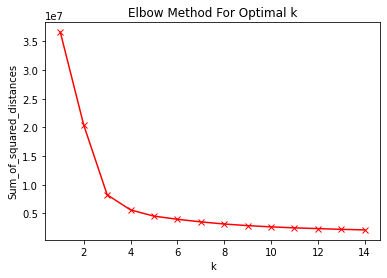

In [481]:
fitting(df_cluster)

In [482]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121920 entries, 0 to 227626
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  121920 non-null  float64
 1   weekly_consumption_hour       121920 non-null  float64
 2   num_ideal_streaming_services  121920 non-null  float64
 3   age                           121920 non-null  float64
 4   initial_credit_card_declined  121920 non-null  bool   
 5   payment_period                121920 non-null  int64  
 6   gender                        121920 non-null  float64
 7   package_base                  121920 non-null  float64
 8   package_econ                  121920 non-null  float64
 9   package_enhanced              121920 non-null  float64
 10  intended_exclusive            121920 non-null  float64
 11  intended_replace_OTT          121920 non-null  float64
 12  supplement OTT                121920 non-nul

In [469]:
del df_cluster["op_ios"]

In [484]:
#determine K=3
kmean=KMeans(n_clusters=3).fit(df_cluster)

In [485]:
x = pd.DataFrame(kmean.cluster_centers_, columns=["num_weekly_services_utilized","weekly_consumption_hour ","num_ideal_streaming_services","age","initial_credit_card_declined",
                                                 "payment_period","gender","package_base","package_econ","package_enhanced","intended_exclusive","intended_replace_OTT","supplement OTT","expand international access",
                                                 "expand regional access","education","genre_comedy","genre_drama","genre_regional","genre_international","op_ios"])
x

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,initial_credit_card_declined,payment_period,gender,package_base,package_econ,package_enhanced,...,intended_replace_OTT,supplement OTT,expand international access,expand regional access,education,genre_comedy,genre_drama,genre_regional,genre_international,op_ios
0,2.169322,28.483032,1.388566,54.827455,0.039880,1.275692,0.130272,0.568759,0.076683,0.320986,...,0.160264,0.178665,0.012508,0.017528,0.005021,0.686043,0.199969,0.032066,0.036955,0.642888
1,2.063055,28.508441,1.354771,32.453452,0.057194,1.326918,0.120114,0.479468,0.043017,0.424073,...,0.278737,0.175529,0.022069,0.023481,0.007350,0.697356,0.158159,0.054835,0.023559,0.653585
2,0.023231,0.004862,0.007006,46.162691,0.001926,1.280534,0.031343,0.678248,0.024378,0.296800,...,0.188921,0.122014,0.000246,0.000164,0.000205,0.856803,0.125456,0.009669,0.006719,0.778711


In [486]:
x.describe()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,initial_credit_card_declined,payment_period,gender,package_base,package_econ,package_enhanced,...,intended_replace_OTT,supplement OTT,expand international access,expand regional access,education,genre_comedy,genre_drama,genre_regional,genre_international,op_ios
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.418536,18.998779,0.916781,44.481199,0.033000,1.294381,0.093910,0.575492,0.048026,0.347286,...,0.209307,0.158736,0.011608,0.013724,0.004192,0.746734,0.161195,0.032190,0.022411,0.691728
std,1.209537,16.449219,0.788069,11.281381,0.028269,0.028281,0.054421,0.099561,0.026510,0.067590,...,0.061812,0.031841,0.010939,0.012115,0.003644,0.095490,0.037349,0.022583,0.015151,0.075519
min,0.023231,0.004862,0.007006,32.453452,0.001926,1.275692,0.031343,0.479468,0.024378,0.296800,...,0.160264,0.122014,0.000246,0.000164,0.000205,0.686043,0.125456,0.009669,0.006719,0.642888
25%,1.043143,14.243947,0.680888,39.308071,0.020903,1.278113,0.075729,0.524114,0.033697,0.308893,...,0.174592,0.148771,0.006377,0.008846,0.002613,0.691699,0.141808,0.020868,0.015139,0.648237
50%,2.063055,28.483032,1.354771,46.162691,0.039880,1.280534,0.120114,0.568759,0.043017,0.320986,...,0.188921,0.175529,0.012508,0.017528,0.005021,0.697356,0.158159,0.032066,0.023559,0.653585
75%,2.116189,28.495737,1.371669,50.495073,0.048537,1.303726,0.125193,0.623504,0.059850,0.372529,...,0.233829,0.177097,0.017288,0.020505,0.006185,0.777080,0.179064,0.043450,0.030257,0.716148
max,2.169322,28.508441,1.388566,54.827455,0.057194,1.326918,0.130272,0.678248,0.076683,0.424073,...,0.278737,0.178665,0.022069,0.023481,0.007350,0.856803,0.199969,0.054835,0.036955,0.778711


#### Clustering for all customers

In [374]:
df_cluster2 = df1.copy()

In [376]:
del df_cluster2["male_TF"]
del df_cluster2["country"]
del df_cluster2["attribution_technical"]
del df_cluster2["attribution_survey"]
del df_cluster2["language"]
del df_cluster2["payment_type"]
del df_cluster2["cancel_date"]
del df_cluster2["plan_type"]
del df_cluster2["account_creation_date"]
del df_cluster2["trial_end_date"]
del df_cluster2["num_trial_days"]
del df_cluster2["join_fee"]
del df_cluster2["monthly_price"]
del df_cluster2["discount_price"]
del df_cluster2["months_per_bill_period"]
del df_cluster2["trial_completed"]
del df_cluster2["current_sub_TF"]

In [377]:
#Turn package_type to numeric

df_cluster2.loc[df_cluster2['package_type'] != "base",'package_base'] = 0
df_cluster2.loc[df_cluster2['package_type'] == "base",'package_base'] = 1

del df_cluster2["package_type"]

#Turn preferred_genre to numeric

df_cluster2.loc[df_cluster2['preferred_genre'] != "comedy",'genre_comedy'] = 0
df_cluster2.loc[df_cluster2['preferred_genre'] == "comedy",'genre_comedy'] = 1

del df_cluster2["preferred_genre"]

#Turn intended_use to numeric


df_cluster2.loc[df_cluster2["intended_use"] != "access to exclusive content",'intended_exclusive'] = 0
df_cluster2.loc[df_cluster2["intended_use"] == "access to exclusive content",'intended_exclusive'] = 1

df_cluster2.loc[df_cluster2["intended_use"] != "replace OTT",'intended_replace_OTT'] = 0
df_cluster2.loc[df_cluster2["intended_use"] == "replace OTT",'intended_replace_OTT'] = 1

del df_cluster2["intended_use"]

#Turn op_sys

df_cluster2.loc[df_cluster2['op_sys'] != "iOS",'op_ios'] = 0
df_cluster2.loc[df_cluster2['op_sys'] == "iOS",'op_ios'] = 1

del df_cluster2['op_sys']

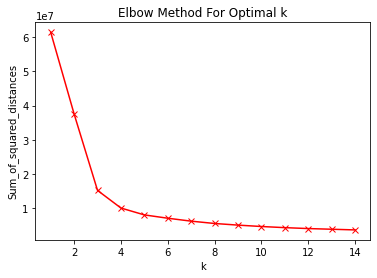

In [497]:
fitting(df_cluster2)

In [379]:
#determine K=3
kmean_all=KMeans(n_clusters=3).fit(df_cluster2)

x_all = pd.DataFrame(kmean_all.cluster_centers_, columns=["num_weekly_services_utilized","weekly_consumption_hour ","num_ideal_streaming_services","age","initial_credit_card_declined",
                                                 "payment_period","gender","package_base","genre_Comedy","intended_exclusive","intended_replace_OTT","op_ios"])
x_all

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,initial_credit_card_declined,payment_period,gender,package_base,genre_Comedy,intended_exclusive,intended_replace_OTT,op_ios
0,0.029609,0.017656,0.011985,46.199433,0.001918,0.921155,0.046613,0.683633,0.776860,0.536772,0.359765,0.773532
1,1.951970,27.897124,1.321781,56.989707,0.037492,0.643529,0.132236,0.480653,0.485247,0.392533,0.264756,0.644209
2,1.976328,28.121011,1.360822,34.138015,0.053517,0.916268,0.118991,0.434405,0.556426,0.344223,0.343301,0.657344


### Churn Model (Logistic)

In [407]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [388]:
df_churn = df1.copy()

In [389]:
del df_churn["male_TF"]
del df_churn["country"]
del df_churn["attribution_technical"]
del df_churn["attribution_survey"]
del df_churn["language"]
del df_churn["payment_type"]
del df_churn["cancel_date"]
del df_churn["plan_type"]
del df_churn["account_creation_date"]
del df_churn["trial_end_date"]
del df_churn["num_trial_days"]
del df_churn["join_fee"]
del df_churn["monthly_price"]
del df_churn["discount_price"]
del df_churn["months_per_bill_period"]
del df_churn["trial_completed"]
del df_churn["payment_period"]

In [390]:
#Turn package_type to numeric
df_churn.loc[df_churn['package_type'] != "base",'package_base'] = 0
df_churn.loc[df_churn['package_type'] == "base",'package_base'] = 1
del df_churn["package_type"]

#Turn preferred_genre to numeric
df_churn.loc[df_churn['preferred_genre'] != "comedy",'genre_comedy'] = 0
df_churn.loc[df_churn['preferred_genre'] == "comedy",'genre_comedy'] = 1
del df_churn["preferred_genre"]

#Turn intended_use to numeric
df_churn.loc[df_churn["intended_use"] != "access to exclusive content",'intended_exclusive'] = 0
df_churn.loc[df_churn["intended_use"] == "access to exclusive content",'intended_exclusive'] = 1
df_churn.loc[df_churn["intended_use"] != "replace OTT",'intended_replace_OTT'] = 0
df_churn.loc[df_churn["intended_use"] == "replace OTT",'intended_replace_OTT'] = 1
del df_churn["intended_use"]

#Turn op_sys
df_churn.loc[df_churn['op_sys'] != "iOS",'op_ios'] = 0
df_churn.loc[df_churn['op_sys'] == "iOS",'op_ios'] = 1
del df_churn['op_sys']

In [391]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210428 entries, 0 to 227627
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num_weekly_services_utilized  210428 non-null  float64
 1   weekly_consumption_hour       210428 non-null  float64
 2   num_ideal_streaming_services  210428 non-null  float64
 3   age                           210428 non-null  float64
 4   initial_credit_card_declined  210428 non-null  bool   
 5   current_sub_TF                210428 non-null  bool   
 6   gender                        210428 non-null  float64
 7   package_base                  210428 non-null  float64
 8   genre_comedy                  210428 non-null  float64
 9   intended_exclusive            210428 non-null  float64
 10  intended_replace_OTT          210428 non-null  float64
 11  op_ios                        210428 non-null  float64
dtypes: bool(2), float64(10)
memory usage: 28.1 M

In [392]:
X = df_churn[["num_weekly_services_utilized","weekly_consumption_hour","num_ideal_streaming_services","age",
             "initial_credit_card_declined","gender","package_base","genre_comedy","intended_exclusive",
             "intended_replace_OTT","op_ios"]]
y = df_churn["current_sub_TF"]

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140986, 11) (69442, 11) (140986,) (69442,)


In [400]:
lr=LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [401]:
predicted_list=lr.predict(X_test)

In [404]:
score_1=accuracy_score(y_test,predicted_list)
score_1

0.7790962241870913

Logistic: ROC AUC=0.771


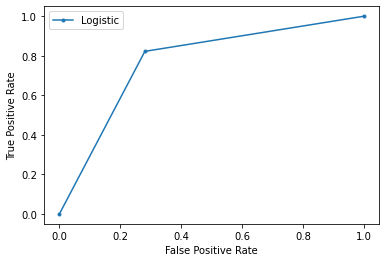

In [412]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


lr_auc = roc_auc_score(y_test,predicted_list)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test,predicted_list)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [494]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [496]:
param_test = {'n_estimators': range(100, 150, 10),'max_depth':  range(2, 5, 1)}

estimator = GradientBoostingClassifier()

gsearch = GridSearchCV(estimator , param_grid = param_test, cv=5)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))


best score is: 0.8047027885460759
best params are: {'max_depth': 4, 'n_estimators': 140}


In [359]:
clf = GradientBoostingClassifier(max_depth = 4, n_estimators = 120)